<img src="../figuras/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
Multi-qubits
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{ {\mathcal H} } $
$ \newcommand{\cg}[1]{{\rm C}#1} $

In [18]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex

<a id='top'></a>

- [Multi-qubit states](#multiq) 

    - [Multi-qubit bases](#multiqbases)
    
    - [Multi-qubit circuits](#multiqcircuits)

    


<a id='multiq'></a>

# Multi-qubit states

<a id='multiqbases'></a>

## Multi-qubit bases

 Let $\{ \ket{i}\}_{i=0,1}$ be the computational basis of the Hilbert space of a qubit $\Hil = {\mathbb C}^2$.
 
<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Definition: </b> 
<br>
The computational basis of $ \Hil^{\otimes n}$ is formed by all possible strings of elements
<br>
<br>
$$
 \ket{i_{n-1}}\otimes \ket{i_{n-2}}\otimes ... \otimes \ket{i_0} ~\equiv ~\ket{i_{n-1} i_{n-2}...i_0}~$$ 
<br>   
where $~~
 i_{n-1},...,i_0=0,1$
</div>

<br>



The *dimension* dim($\Hil^{\otimes n}$) = $2^n$ matches the number of different possible combinations: $2\times 2...\times 2 = 2^n$.



- When we switch to column vectors to represent a ket, the tensor product translates into the Kronecker product. For example, for a 2-qubit system, $n=2$ and we would have $2^n=2^2 = 4$ and then


$$
\ket{00}~=~ \ket{0}\otimes \ket{0}~=~
\begin{bmatrix}1\\ 0\end{bmatrix} \otimes \begin{bmatrix}1\\ 0\end{bmatrix} = \begin{bmatrix}1\\0\\0 \\ 0\end{bmatrix}
~~~~~~,~~~~~
\ket{01}~=~ \ket{0}\otimes \ket{1}~=~
\begin{bmatrix}1\\ 0\end{bmatrix} \otimes \begin{bmatrix}0\\ 1\end{bmatrix} = \begin{bmatrix}0\\1\\0 \\ 0\end{bmatrix}
$$


<br>

$$
\ket{10}~=~ \ket{1}\otimes \ket{0}~=~
 \begin{bmatrix}0\\ 1\end{bmatrix} \otimes \begin{bmatrix}1\\ 0\end{bmatrix} = \begin{bmatrix}0\\0\\1 \\ 0\end{bmatrix}
 ~~~~~,~~~~
\ket{11}~=~ \ket{1}\otimes \ket{1}~=~
\begin{bmatrix}0\\ 1\end{bmatrix} \otimes \begin{bmatrix}0\\ 1\end{bmatrix} = \begin{bmatrix}0\\0\\0 \\ 1\end{bmatrix}
$$



The labels of the vectors and, therefore, of the components of the matrices, bi-indices $ij=11,12,21,22$ that adopt the same number, $N^2$, of different configurations. 


<div class="alert alert-block alert-danger">
<b> Note: </b>
    
The <i>multi-index</i> $i_{n-1}i_{n-2}....i_0$ can be interpreted as an integer, $p$, written in *binary* base
<br>

$$
~~ i_{n-1} i_{n-2}...i_0 ~~\longleftrightarrow ~~~p = 2^{n-1} i_{n-1} + ... + 2^0 i_0 =  \sum_{k=0}^{n-1} 2^k i_k 
$$
<br>
which will take $2^n$ values $p = 0,1, \, ...\, ,2^{n}-1$. 
<br>
<br>    
The change of notation *multi-index* $\leftrightarrow$ *integer in decimal notation* will be frequent and will apply to any element. 
    
For example $\ket{000} = \ket{0}, \ket{111} = \ket{7}$ etc.
</div>

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<br>    
The most general state vector  $\ket{u}\in \Hil^{\otimes n}$ will be a linear combination of elements of the computational basis $\ket{i_n i_{n-1}...i_1}$ in terms of some components $u_{i_ni_{n-1}...i_1}$
<br>    
<br>
$$
\ket{u} = \sum_{i_{n-1},...,i_0=0,1} u_{i_{n-1} ... i_0} \ket{i_{n-1}  ... i_0}  = \sum_{p=0}^{2^n-1} u_p \ket{p} \, .
$$
<br>
where we have used binary and decimal notation interchangeably. 
</div>





<div class="alert alert-block alert-warning">
<b>Example:</b>for $n=2$ we will have, in binary notation  

\begin{array}{ccc}
\ket{u} ~&=& ~ \sum_{i,j=0,1} u_{ij} \ket{ij}~=~ u_{00}\ket{00}+ u_{01}\ket{01} + u_{10}\ket{10} +u_{11}\ket{11}
\\ \\
~&=&~ u_{00}\begin{bmatrix}1\\0\\0 \\ 0\end{bmatrix}+ u_{01}  \begin{bmatrix}0\\1\\0 \\ 0\end{bmatrix} + u_{10}\begin{bmatrix}0\\0\\1\\0\end{bmatrix}+u_{11}  \begin{bmatrix}0\\0\\0\\1\end{bmatrix}   ~ = \begin{bmatrix}u_{00}\\ u_{01}\\ u_{10} \\ u_{11}  \end{bmatrix}
\end{array}

and in decimal notation, for the same vector
\begin{array}{ccc}
\ket{u} ~&=& ~ \sum_{k=0}^{2^2-1=3} u_{k} \ket{k}~=~ u_{0}\ket{0}+ u_{1}\ket{1} + u_{2}\ket{2} +u_{3}\ket{3}
\\ \\
~&=&~ u_{0}\begin{bmatrix}1\\0\\0 \\ 0\end{bmatrix}+ u_{1}  \begin{bmatrix}0\\1\\0 \\ 0\end{bmatrix} + u_{2}\begin{bmatrix}0\\0\\1\\0\end{bmatrix}+u_{3}  \begin{bmatrix}0\\0\\0\\1\end{bmatrix}   ~ = \begin{bmatrix}u_{0}\\ u_{1}\\ u_{2} \\ u_{3}  \end{bmatrix}
\end{array}

There should be no confusion between both notations since, as soon as a number greater than 1 appears, it means we are dealing with the decimal base. 
</div>

  
<div class="alert alert-block alert-success">
    <b>Exercise 1.2.1.2</b> 
Normalize the vector $\ket{u} = (1+i)\ket{101} -2\ket{010} + 3\ket{111}$ and write it in decimal notation
</div>

<a id='multiqcirc'></a>

## Multi-qubit Circuits

Let 
$$\ket{q_{n-1}q_{n-2}...q_0}
 = \ket{q_{n-1}}\otimes  \ket{q_{n-2}}\otimes ...\otimes  \ket{q_{0}} 
$$ 

be a multi-qubit state of the computational basis $q_{a} = 0,1$. 

This state 
propagates along a circuit such that <i>each line represents a Hilbert space</i>. 

The most common assignment in quantum computing programs places the *least significant* qubit $q_0$ on the top line. This is

- Qiskit:  

<center>
<figure>
<a id='fig_ref'></a>
<img src="images/Multicubit_circ.png" align=center width='30%'/>
    <center></center>
</figure>
</center>

This ordering is the reverse of what appears in traditional texts (*Nielsen Chuang*, etc.)

- All the others

<center>
<figure>
<a id='fig_ref'></a>
<img src="images/Multicubit_circ_NC.png" align=center width='30%'/>
    <center></center>
</figure>
</center>

## Entanglement

In general, the states $\ket{u}\in \Hil^{\otimes n}$ belong to two disjoint sets
    <br>
    
   - factorizable states, when $\ket{u} = \ket{a}\otimes \ket{b}\otimes...\otimes \ket{c}$
<br>

   - entangled states, when $\ket{u} \neq \ket{a}\otimes \ket{b}\otimes...\otimes \ket{c}$ is not factorizable
    
  

Now we can also use bases whose elements are factored or entangled vectors.

- **computational basis** (factored): $\{ \ket{00},\ket{01},\ket{10},\ket{11}\}$
<br>

- **Bell basis** (entangled): 

\begin{array}{rcl}
\ket{00}_B &=& \frac{1}{\sqrt{2}} \big( \ket{00} + \ket{11} \big) ~= ~\ket{\Phi^+} \\
\ket{01}_B &=& \frac{1}{\sqrt{2}} \big( \ket{00} - \ket{11} \big) ~= ~\ket{\Phi^-}\\
\ket{10}_B &=& \frac{1}{\sqrt{2}} \big( \ket{01} + \ket{10} \big) ~= ~\ket{\Psi^+} \\
\ket{11}_B &=& \frac{1}{\sqrt{2}} \big( \ket{01} - \ket{10} \big) ~= ~\ket{\Psi^-}\\
\end{array}

<br>

## Partial Measurements

A partial measurement affects only a subset of qubits in a multi-qubit system.

Here we find a crucial difference between factorizable and entangled states.

Let's consider the *factorizable* bi-qubit state seen before

$$
\ket{u} = \ket{a}\otimes \ket{b} = \frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big)\otimes \frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big)\, .
$$

where we will assume that the qubit $\ket{a}$ is in Alice's laboratory, and the qubit $\ket{b}$ is in Bob's.

A measurement by Alice on the first qubit can only result, with probability $1/2$, in one of the two possible states below  
<br>
$$
\ket{u} ~\rightarrow ~ \left\{ \begin{matrix}\ket{0} \otimes \frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big)\\ \ket{1} \otimes \frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big) \end{matrix} \right.
$$
<br>

We see that, after this measurement, the second qubit remains intact. If Bob measures, he can obtain $\ket{0}$ or $\ket{1}$ with probability $1/2$.
<br>
In this case, the measurements of Alice and Bob *are not correlated* 


 However, if the state is *entangled*, for example, 
<br>

$$
  \ket{u} = \frac{1}{\sqrt{2}}\big( \ket{00} + \ket{11} \big)\, ,
$$
<br>
a measurement by Alice on the first qubit collapses the entire state to one of the two possible outcomes 
<br>
<br>
$$
\ket{u} ~\stackrel{\hbox{if Alice measures}}{\longrightarrow} ~ \left\{ \begin{matrix}\ket{0}   \\ \ket{1} \end{matrix} \right. \, 
\stackrel{\hbox{ Alice writes}}{\longrightarrow} ~ \left\{ \begin{matrix}\ket{0}\otimes\ket{0}  \\ \ket{1}\otimes \ket{1}\end{matrix} \right. \, .
$$
<br>
also with a probability of 1/2 for each case.



We see that now: the state of the second qubit has undergone a collapse *correlated with the result* of the measurement of the first

- If Alice measured $\ket{0}$, she knows Bob can only obtain $\ket{0}$
<br>
<br>
- If Alice measured $\ket{1}$, she knows Bob can only obtain $\ket{1}$
<br>

the measurements of Alice and Bob are indeed 100\% *correlated*


This correlation is independent of the distance separating Alice and Bob. That seems to violate causality.

Einstein, Podolsky, and Rosen in 1935 thought that this fact demonstrated that Quantum Mechanics was incomplete. This is known as the [*EPR paradox*](https://en.wikipedia.org/wiki/Einstein%E2%80%93Podolsky%E2%80%93Rosen_paradox)

<div class="alert alert-block alert-danger">
<b> Notice: </b>
<br>    
    
- the collapse does not involve anything physical going to the qubit  in Bob's lab
<br>
    
- it is all a statement are about the <b>description of the system</b> by Alice according to <b>her</b> knowledge of the experiment. 
<br>        
    
- the perfect correlation is the same one would obtain by preparing a classical situation with perfect *a priori* correlation. 
<br>
    
- in order to reveal effects that are non-classical, we need to introduce measurements that do not commute. This was first done by John Bell in 1964.
<br>
    
- The way to describe the previous EPR process from the point of view of Bob needs to wait until we introduce the density matrix formalism.    
    

</div>

# Multi-qubit Gates

## Product gates: Pauli strings

Pauli operators can be chained using the tensor product to act on $\Hil^n$.

For example, the following operators act on $\Hil^{\otimes 4}$

$$
 P = X Y Z I , ~X X I Y ,~~ I I I Z, ...
$$


We refer to these operators as *Pauli strings*. They inherit important properties from the Pauli matrices themselves: they are Hermitian operators

$$
(X Y Z I)^\dagger  = X^\dagger Y^\dagger Z ^\dagger I^\dagger = X Y Z I
$$

and unitary

$$
(X Y Z I )(X Y Z I)^\dagger = X^2 Y^2 Z^2 I^2 = I I I I 
$$

## The Walsh-Hadamard Gate

The Walsh-Hadamard operator is a chain of Hadamard operators
<br>
<br>
$$
W =  H^{\otimes n} = H\otimes H \ldots \otimes H 
$$




The action of $W$ on the reference state $\ket{00...0}$ produces a uniform superposition of all the basis states
<br>
<br>

\begin{eqnarray}
W \ket{00...0} &~=~& H\ket{0}\otimes H\ket{0} \otimes ... \otimes H\ket{0} \\  \rule{0mm}{10mm}
&=& \frac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big)\otimes \frac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big)\otimes ...\otimes \frac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big)\\ \rule{0mm}{8mm}
&=& \frac{1}{2^{n/2}}\big(\ket{00...00} + \ket{00...01}+....+\ket{11...11} \big)
\end{eqnarray}
 

<div class="alert alert-block alert-danger",text-align:center>
<b> Note</b>:
We are going to rewrite the action of $W$ so that it does not become unmanageable when $n$ grows.
To do this, let's recall the action of $H$ on a single qubit $\ket{x} = \ket{0}$ or $\ket{1}$
    
$$
H\ket{x} = \frac{1}{\sqrt{2}}\sum_{y=0,1}(-1)^{xy}\ket{y}
$$

Then, using the distributivity of the product of sums, we can manipulate
<br>

    
$$
\begin{array}{rcl}
W \ket{x} &=& H\ket{x_{n-1}}\otimes H\ket{x_{n-2}}\otimes \ldots \otimes H\ket{x_0} \\  \rule{0mm}{8mm}
&=&\frac{1}{\sqrt{2}} \sum_{y_{n-1}= \, 0,1} (-1)^{y_{n-1}x_{n-1}}\ket{y_{n-1}}\otimes\frac{1}{\sqrt{2}} \sum_{y_{n-2}=0,1} (-1)^{y_{n-2}x_{n-2}}\ket{y_{n-2}} \otimes \ldots \otimes \frac{1}{\sqrt{2}} \sum_{y_{0}\, =\, 0,1} (-1)^{y_{0}x_{0}}\ket{y_{0}} \\ \rule{0mm}{8mm}
&=& \frac{1}{2^{n/2}}\sum_{y_{n-1} y_{n-2}\ldots y_{0}=\, 0,1} (-1)^{x_{n-1} y_{n-1}+ \ldots + x_0 y_0} \ket{y_{n-1}\ldots y_0} \hspace{5.2cm}\\
&=& \frac{1}{2^{n/2}} \sum_{y \, =\, 0}^{2^n-1}(-1)^{x\cdot y} \ket{y} \rule{0mm}{8mm}
\end{array}
$$
    
where 

    
$$ x\cdot y = x_{n-1} y_{n-1} + x_{n-1} y_{n-1} + \ldots + x_0 y_0$$
    
This expression will be very useful when we study simple algorithms
</div>


<div class="alert alert-block alert-success">
<b>Exercise </b>  
write the Kronecker product of two matrices $H\otimes H$ and verify that its components satisfy

$$
W_{xy} =  \frac{1}{2^{n/2}} \sum_{y \, =\, 0}^{2^n-1}(-1)^{x\cdot y}
$$
where $n=2 $ and $x,y = 0,1$.
</div>
    

## The SWAP gate

 The SWAP gate is a fundamental binary gate, whose action consists of permuting the existing states in the individual registers on which it acts. In particular, on the basis elements


$$
U_{\rm SWAP }: \ket{00}\to\ket{00}~~,~~\ket{01}\to\ket{10}~~,~~\ket{10}\to\ket{01}~~,~~
\ket{11}\to\ket{11}\, .
$$


This allows us to write the operator in the outer product notation

$$
U_{\rm SWAP } = \ket{00}\bra{00} + \ket{01}\bra{10} + \ket{10}\bra{01} +\ket{11}\bra{11} 
$$


with associated matrix 
$$
U_{\rm SWAP} =  \begin{bmatrix} 
1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1
\end{bmatrix}
$$

and its insertion into a circuit is represented in the following form

<figure><center>
<a id='fig_ref'></a>
<img src="images/SWAP_gate.png" align=center width='20%'/>
</center></figure>


## Controlled gates $\cg{U}$

In the controlled gate, an operator is applied to a qubit depending on the state of another qubit.

This second qubit is called the *control*, while the first is the *target*.

The controlled gate is represented as follows
<br>
<br>

$$
\cg{U}_{[1 0]} =  \ket{0}\bra{0} \otimes I  ~+~  \ket{1}\bra{1} \otimes  U
$$
<br>

where $U$ is a general 1-qubit unitary operator. The first integer in the subscript indicates the control qubit, and the second indicates the target qubit.
In this way

$$
\cg{U}_{[0 1]} =  I\otimes \ket{0}\bra{0}    ~+~ U \otimes \ket{1}\bra{1}
$$

 (notice we are adhering here to Qiskit convention)

If in the control qubit 
<br>
    
- enters $\ket{0}$, it exits as $\ket{0}$ and nothing is done to the controlled qubit (the $I$ is applied)
<br>

- enters $\ket{1}$, it exits as $\ket{1}$ and the operator $U$ is applied to the controlled qubit



The *matrix representation* of $\cg{U}$ is easy to obtain as a sum of *Kronecker products* 


\begin{eqnarray}
\cg{U}_{[10]} &=& \begin{bmatrix}1 & 0 \\ 0 & 0 \end{bmatrix}\otimes  I +  \begin{bmatrix}0 & 0 \\ 0 & 1 \end{bmatrix} \otimes U
= \begin{bmatrix} 1\times I & 0 \\ 0 & 0 \end{bmatrix}  + 
\begin{bmatrix} 0 & 0 \\ 0 & 1\times U \end{bmatrix} \\
&=& \begin{bmatrix}   I & 0 \\ 0 &   U \end{bmatrix} = 
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & U_{11} & U_{12} \\
0 & 0 & U_{21} & U_{22}\end{bmatrix}
\end{eqnarray}



<div class="alert alert-block alert-danger">

- Written in this way, it is evident that if $U$ is a unitary matrix, $\cg{U}$ is also unitary $~
\Rightarrow (\cg{U})^\dagger \cg{U} = I$
<br>

- This is not trivial because the linear combination of unitary operators is generally not unitary.
</div>

- The *action* of $\cg{U}$ on basis elements $\{\ket{x}\}$ where $x=0,1$ admits a compact form 
<br>
<br>
$$
\cg{U}:\ket{x}\otimes\ket{y} = \ket{x} \otimes U^x\ket{y}
$$

- The *graphical representation* of the circuit associated with the controlled operator $\cg{U}$ is the following

<br>


<figure><center>
<a id='fig_ref'></a>
<img src="images/cu_gate.png" align=center width='20%'/>
    <center></center>
</center></figure>


with $x,y = 0,1$.


<div class="alert alert-block alert-success">
    <b>Exercise </b>  
    
write the operators   

-  $\cg{U}_{[01]}$ 
<br>
    
-  $\bar{\rm C}U_{[10]}$ where $U$ acts if the control qubit is in $\ket{0}$ instead of in $\ket{1}$

</div>
    

Operators like this exist in classical circuits. The fascinating novelty is that now, a *superposition* $a\ket{0} + b\ket{1}$ could circulate through the first qubit.

In that case, the result of a controlled action also leads to a superposition, in such a way that **entanglement is generated**


To see it, let's apply $\cg{U}$ to a state of the form $\ket{\phi} = (a\ket{0} + b\ket{1})\otimes \ket{U}$, which is *factorizable*

<br>

\begin{eqnarray}
\cg{U}\,(a\ket{0} +b \ket{1})\otimes \ket{v} &=&
    \left(\ket{0}\bra{0}\otimes I + \ket{1}\bra{1}\otimes U\rule{0mm}{4mm}\right)(a\ket{0} +b \ket{1})\otimes \ket{v}  
  \\ \rule{0mm}{14mm}
    &=& a\ket{0}\otimes \ket{v} + b\ket{1}\otimes U\ket{v} \nonumber
\end{eqnarray}


We see that, indeed, the result is an *entangled* state. 

<figure>
<a id='fig_ref'></a>
<img src="images/entangling_CU_circuit.png" align=center width='400px'/>
    <center></center>
</figure>


## The CNOT Gate

The *binary* gate CNOT = $\cg{X}$ is the most common case of a *controlled operator* 
<br>
<br>

$$
\hbox{CNOT} = \cg{X} ~=~ \ket{0}\bra{0}\otimes I + \ket{1}\bra{1}\otimes X ~=~ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0\end{bmatrix}
$$

$\rule{0.5cm}{0mm}$ graphically

<figure><center>
<a id='fig_ref'></a>
<img src="images/cX_gate.png" align=center width='30%'/>
    <center></center>
</center></figure>


On computational basis elements $\ket{xy}=\ket{x}\otimes\ket{y}$ where $\, x,y= 0,1$, its action can be compactly represented using the modulo two sum

$$
\cg{X}:\ket{x}\otimes\ket{y}=  \ket{x} \otimes X^x\ket{y} = \ket{x} \otimes \ket{y\oplus x}
$$



<br>
<div class="alert alert-block alert-success">
<b> Exercise 1.2.1.4 </b>
    
the most general factorizable state of two qubits is ($a$ is the normalization)
<br>
<br>    
$$
\ket{\psi} = a \left(\ket{0} + b_1 e^{i\phi_1}\ket{1}) (\ket{0} + b_0 e^{i\phi_0} \ket{1} \right) 
$$
<br>

Write the most general condition that $b_0,b_1,\phi_0$ and $\phi_1$ must satisfy for CNOT$\ket{\psi}$ to be an entangled vector.
</div>

The CNOT gate in qiskit appears inverted compared to the one we drew above. This is because qiskit orders the qubits in $\ket{q_1 \, q_0}$, placing the one associated with the most significant bit, $q_1$, at the bottom. 

```

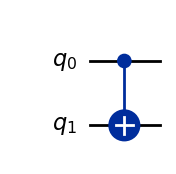

In [20]:
from qiskit import  QuantumCircuit
qc = QuantumCircuit(2)

qc.cx(0,1)

qc.draw(output='mpl')

now we can request the unitary operator that reproduces the previous circuit


In [21]:
from qiskit.quantum_info import Operator

Op_qc = Operator.from_circuit(qc) 

Op_qc.draw("latex")

<IPython.core.display.Latex object>

## The CSWAP or Fredkin Gate

If the control qubit is in the state $\ket{1}$, the two controlled ones are swapped
<br>
<br>
$$
U_{\rm CSWAP} =\ket{0}\bra{0} \otimes I_4 + \ket{1}\bra{1} \otimes U_{\rm SWAP} \, .
$$

<br>

<figure><center>
<a id='fig_ref'></a>
<img src="images/CSWAP_gate.png" align=center width='15%'/>
    <center></center>
    </center></figure>


## The CCNOT or Toffoli Gate

The CCNOT gate, also called the Toffoli gate, is an operator on $\Hil^{\otimes 3}$, where two qubits control the action of $X$ on a third one.

$\Rightarrow$
*only if both* control qubits are in the state $\ket{11}$ will the operator $X$ act on the third one.
<br>
<br>


<figure><center>
<a id='fig_ref'></a>
<img src="images/ccX_gate.png" align=center width='20%'/>
</center></figure>

<br>

Again, its representation is very simple

$$
{\rm CCNOT} = \big(\ket{00}\bra{00}+\ket{01}\bra{01}+\ket{10}\bra{10}\big)\otimes I + \ket{11}\bra{11}\otimes X
$$



<div class="alert alert-block alert-success">
<b> Exercises 1.2.1.5 </b> 
<br>    
<br>    
1. obtain the matrix that represents the Toffoli gate in the computational basis. Reproduce it using <i>qiskit</i>.
    <br><br> 
2. obtain the matrix of a 3-qubit circuit with a CNOT gate where the third qubit controls the first. Reproduce it using qiskit.
</table>

## Multi-controlled Gates

In the multi-controlled CNOT or CX gate, the X operator is activated if and only if the control qubits are in a desired configuration.

The white buttons denote controllers that are activated if the qubit is $\ket{0}$. Essentially, they are the same as a black controller with an $X$ gate before and after.


For example, in this case, the $X$ gate will be activated if the control qubits are in the state $\ket{1100}$


<figure><center>
<a id='fig_ref'></a>
<img src="images/MCX_gate.png" align=center width='8%'/>
<center></center>
</center></figure>

The operator associated with this gate will be

$$
MCX = \ket{0011}  \bra{0011}\otimes X + (I-\ket{0011}\bra{0011}) \otimes I
$$

<div class="alert alert-block alert-warning">

In *qiskit* there is the possibility to control an arbitrary gate (of the class <i>Gate</i>) by adding the <i>control</i> method which accepts two parameters:

- the first is the number of qubits that will act as control.
    

- the second, <i>ctrl_state</i>, is a decimal number that specifies the control state for which the gate is activated. In the case of the figure, it would be the number 12.


- Information about controlled gates in qiskit can be found at the following links:
https://qiskit.org/documentation/stubs/qiskit.circuit.ControlledGate.html#qiskit.circuit.ControlledGate
https://qiskit.org/documentation/apidoc/circuit_library.html
    
    
</div>

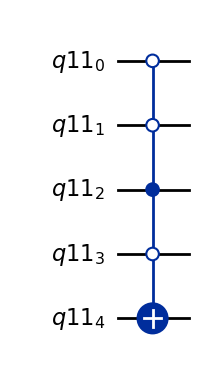

In [26]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import SwapGate, XGate

qr = QuantumRegister(5)

qc = QuantumCircuit(qr)

gateMCX = XGate().control(4,ctrl_state= 4) # puerta X 4-veces controlada
gateMCSWAP = SwapGate().control(3,ctrl_state= 4) # puerta SWAP 3 veces controlada

qc.append(gateMCX,qr)    
#qc.append(gateMCSWAP,qr)    

qc.draw('mpl')

In the qiskit convention, indeed, this operator corresponds to

$$
MCX = X\otimes \ket{0011}  \bra{0011} + X\otimes (I-\ket{0011}\bra{0011})
$$

<div class="alert alert-block alert-success">
<b> Exercise: </b>
insert the MCX gate so that the circuit drawn in the figure is generated exactly.
</div>

## Entangling Circuit for the Bell Basis


The circuit that *prepares* the <i>Bell basis</i> $~\{\ket{B_{xy}} \equiv \ket{xy}_B \}~$ from the <i>computational basis</i>  $\{\ket{xy}\}$ 

<br>

<center>
<figure>
<a id='fig_ref'></a>
<img src="images/Bell_basis.png" align=center width='25%'/>
<center></center>
</figure>
</center>

<br>
Specifically 
<br>

\begin{array}{rcl}
\ket{00} ~~~\stackrel{I\otimes H}{\longrightarrow}~~~ \frac{1}{\sqrt{2}}\ket{0}(\ket{0}+\ket{1})  &~~~\stackrel{\rm CNOT(0,1)}{\longrightarrow}& \frac{1}{\sqrt{2}} \big( \ket{00} + \ket{11} \big) ~~=~~ \ket{00}_B \equiv \ket{\Phi^+}\\
\ket{01} ~~~\longrightarrow~~~ \frac{1}{\sqrt{2}}\ket{0}(\ket{0} - \ket{1})  &~~~\longrightarrow & \frac{1}{\sqrt{2}} \big( \ket{00} - \ket{11} \big) ~~=~~ \ket{01}_B \equiv \ket{\Phi^-} \\
\ket{10} ~~~\longrightarrow~~~ \frac{1}{\sqrt{2}}\ket{1}(\ket{0}+\ket{1})  &~~~\longrightarrow & \frac{1}{\sqrt{2}} \big( \ket{10} + \ket{01} \big) ~~=~~ \ket{10}_B \equiv \ket{\Psi^+}\\
\ket{11} ~~~\longrightarrow~~~ \frac{1}{\sqrt{2}}\ket{1}(\ket{0}-\ket{1})  &~~~\longrightarrow & \frac{1}{\sqrt{2}} \big( \ket{01} - \ket{01} \big) ~~=~~ \ket{11}_B \equiv \ket{\Psi^-}
\end{array}


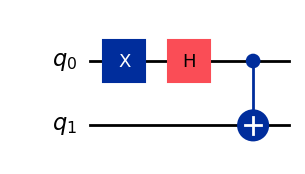

<IPython.core.display.Latex object>

In [29]:
from qiskit_aer import  Aer, StatevectorSimulator

' create the circuit '
qc = QuantumCircuit(2,0)    
qc.x(0)
#qc.x(1)

qc.h(0)
qc.cx(0,1)
display(qc.draw('mpl'))


' execute in mode statevector_simulator '
#simulator = Aer.get_backend('statevector_simulator')
simulator = StatevectorSimulator()
Bell_state = simulator.run(qc).result().get_statevector()


from qiskit.quantum_info import Statevector
Statevector.from_instruction(qc).draw('latex')
#Statevector(Bell_state).draw('latex')

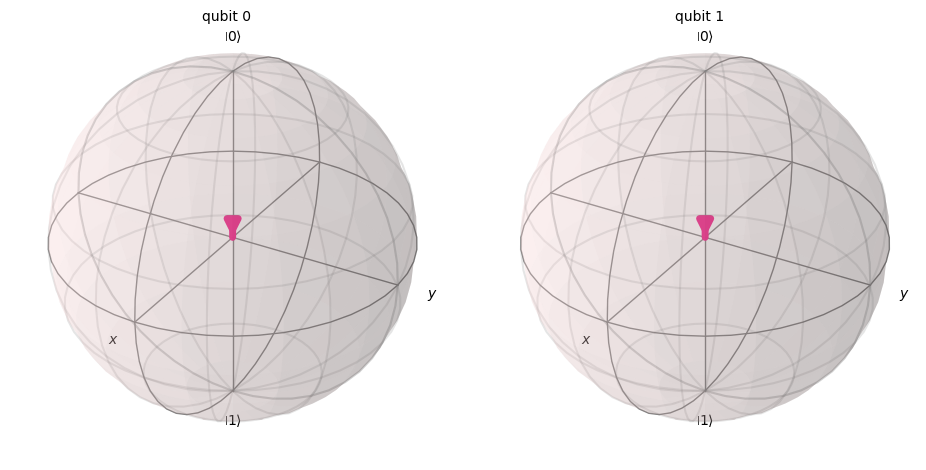

In [30]:
' the Bell state cannot be drawn on Bloch spheres'

Statevector(Bell_state).draw('Bloch')

## Generation of Controlled Gates

Let's consider the following 2-qubit Hamiltonian (set $\hbar = 1$)

$$
H = \omega_1\,  \sigma_z \otimes I + \,   \omega_2\,  I\otimes\sigma_z+ J\, \sigma_z\otimes\sigma_z 
$$

We would like to exploit the evolution caused by $ J\, \sigma_z\otimes\sigma_z$ without worrying about the effect caused by the first two terms (*chemical shifts*)

To achieve this, the idea is to divide the evolution into 2 steps $0\to t/2 \to t$, and insert a *refocusing* operation in the middle, which causes a recovery of the initial phase.

Using that $XZX = -Z$ we see that 

\begin{array}{rcl}
U_J(t) &=& (X\otimes X) e^{-i Ht/2} (X\otimes X)   e^{- i Ht/2}\nonumber\\
\rule{0mm}{4mm}
 &=& \exp \left(-i t\,  J\, \sigma_z\otimes\sigma_z  \right) \nonumber \rule{0mm}{8mm}
\end{array}

The standard basis will only acquire phases $\pm\theta = \pm tJ$ given by the eigenvalues of $Z\otimes Z$
<br>
<br>

$$
 U^{(12)}_J(t J) \ket{i}\otimes \ket{j} = e^{-i tJ \sigma_z\otimes \sigma_z}  \ket{i}\otimes \ket{j}   = e^{-i(-1)^{i+j}t J}\ket{ij}
$$



Now we can apply rotations $R_ z(-2tJ)= e^{i t J \sigma_z}$ to each qubit separately

\begin{array}{rcl}
\hbox{C-Z}\ket{ij} & = & \sqrt{-i}R^{(1)}_ z(-2tJ) R^{(2)}_ z(-2tJ) U^{(12)}_J(tJ)\,  \ket{ij}  \nonumber\\
\rule{0mm}{8mm}
  & = & \sqrt{-i} \left( e^{itJ \sigma_z}\otimes I \rule{0mm}{3mm}\right) \left(\rule{0mm}{3mm} I \otimes  e^{itJ \sigma_z}\right) e^{-i(-1)^{i+j}t J}\ket{ij} \nonumber\\
\rule{0mm}{8mm}
  & = &  e^{-i\pi/4}  e^{it J\left((-1)^i + (-1)^j + (-1)^{i+j+1}\right)}\ket{ij} \nonumber\\
\rule{0mm}{8mm}
  & = &e^{-i\pi/4} \begin{pmatrix} e^{i tJ} & & & \\ & e^{itJ} & & \\ & & e^{itJ} & \\ & & & e^{-3itJ} \end{pmatrix} \begin{pmatrix} \ket{00} \\ \ket{01} \\ \ket{10} \\ \ket{11} \end{pmatrix}
\end{array}


Adjusting the time $t = \pi/4J$ and neglecting a global phase, the $\hbox{C-Z}$ operator is obtained

$$
\hbox{C-Z} ={\rm diag} (1 , 1, 1, -1) =  \ket{0}\bra{0}  \otimes I + \ket{1}\bra{1}\otimes Z
$$


# No-cloning Theorem

The *No-Cloning Theorem* is one of the simplest and yet most important results of the formalism of Quantum Mechanics.

In fact, its complete formalization is quite recent, 1982, due to [Wootters, Zurek](https://en.wikipedia.org/wiki/No-cloning_theorem#cite_note-wootterszurek-2) and [Dieks](https://en.wikipedia.org/wiki/No-cloning_theorem#cite_note-dieks-3).

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Theorem</b>: <i> (no-cloning)</i> 
<br>    
<br>    
there is no unitary operator $U$ that, for an arbitrary state $|\psi\rangle$, performs the following operation
<br>  
<br>    
$$
U ( \ket{\psi}\otimes \ket{0}) = \ket{\psi}\otimes \ket{\psi}
$$
</div>



*Demonstration:*

We will assume that $U$ exists and reach a contradiction. 
Let's try to clone the state $\alpha\ket{\psi}+\beta\ket{\phi}$. This implies evaluating
<br>
<br>

$$
U (\alpha\ket{\psi}+\beta\ket{\phi})\otimes \ket{0} = 
(\alpha\ket{\psi}+\beta\ket{\phi})\otimes (\alpha\ket{\psi}+\beta\ket{\phi})
$$
<br>


However, the linearity of $U$ allows us to follow another path
<br>
<br>

\begin{eqnarray}
U(\alpha|\psi\rangle+\beta|\phi\rangle) \otimes|0\rangle &=& \alpha U|\psi\rangle \otimes|0\rangle+\beta U|\phi\rangle \otimes|0\rangle  \\ \rule{0mm}{12mm}
&=&\alpha|\psi\rangle \otimes|\psi\rangle+\beta|\phi\rangle \otimes|\phi\rangle . \rule{0mm}{6mm}
\end{eqnarray}
<br>

The two results are different and the theorem is proven by reduction to absurdity.

<br>
<div class="alert alert-block alert-danger">
<b> Note: </b>    
<br>  

- The no-cloning theorem highlights the <i> tension </i> between $linearity$ and $tensoriality$, two fundamental properties of Quantum Mechanics.
<br>

- It is very important to emphasize that the validity of this theorem only applies to <i> generic </i> states. 
<br>
    
- If, for example, we restrict ourselves to the basis states $\ket{0}$ and $\ket{1}$, then the mere CNOT gate acts as a cloning operator would.
    
$$
\cg{X}\ket{00}\to \ket{00}~~~~~,~~~~~~ \cg{X}\ket{10}\to \ket{11}
$$
</div>
<br>
<br>